In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

In [11]:
df = pd.read_csv("/kaggle/input/titanic-dataset-machine-learning-from-disaster/train.csv")
print
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [13]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
print("\n✅ Bo‘sh qiymatlar to‘ldirildi!")


✅ Bo‘sh qiymatlar to‘ldirildi!


/tmp/ipykernel_37/3905417292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_37/3905417292.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [14]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [16]:
X = df.drop('Survived', axis=1)
y = df['Survived']

binarizer = Binarizer(threshold=X.median().median())
X_bin = binarizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.2, random_state=42)
print("\n✅ Train/Test:", X_train.shape, X_test.shape)


✅ Train/Test: (712, 7) (179, 7)


In [17]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("\n✅ Bernoulli Naive Bayes model!")


✅ Bernoulli Naive Bayes model!


In [19]:
y_pred = bnb.predict(X_test)
y_prob = bnb.predict_proba(X_test)[:, 1]

In [20]:
print("\n--- Accuracy ---")
print(round(accuracy_score(y_test, y_pred)*100, 2), "%")

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Accuracy ---
68.72 %

--- Confusion Matrix ---
[[72 33]
 [23 51]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       105
           1       0.61      0.69      0.65        74

    accuracy                           0.69       179
   macro avg       0.68      0.69      0.68       179
weighted avg       0.70      0.69      0.69       179



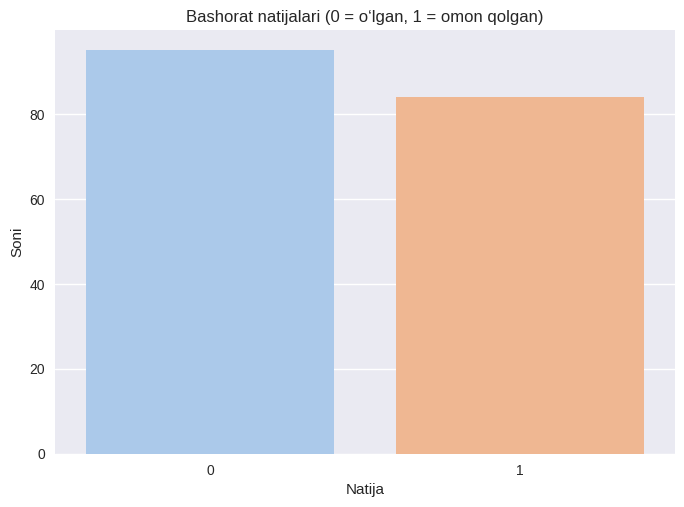

,Real,Predicted,Survival_Prob
0,1,0,0.249
1,0,1,0.557
2,0,0,0.249
3,1,1,0.557
4,1,0,0.249
5,1,1,0.557
6,1,0,0.249
7,0,0,0.249
8,1,0,0.249
9,1,1,0.557


In [23]:
sns.countplot(x=y_pred)
plt.title("Bashorat natijalari (0 = o‘lgan, 1 = omon qolgan)")
plt.xlabel("Natija")
plt.ylabel("Soni")
plt.show()

results = pd.DataFrame({
    'Real': y_test.values,
    'Predicted': y_pred,
    'Survival_Prob': np.round(y_prob, 3)
})
results.head(10)